<a href="https://colab.research.google.com/github/AnoushkaTripathi/Machine-Learning-Projects/blob/main/ENP361_3_PAsign_46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression using Sklearn Library

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.9, random_state=0)

In [ ]:
print(X_train.shape, "\n")
X_train.head()

(691, 8) 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
499,6,154,74,32,193,29.3,0.839,39
720,4,83,86,19,0,29.3,0.317,34
556,1,97,70,40,0,38.1,0.218,30
583,8,100,76,0,0,38.7,0.190,42
150,1,136,74,50,204,37.4,0.399,24


In [ ]:
print(y_train.shape, "\n")
y_train.head()

(691,) 



499    0
720    0
556    0
583    0
150    0
Name: Outcome, dtype: int64

In [ ]:
print(X_test.shape, "\n")
X_test.head()

(77, 8) 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [ ]:
print(y_test.shape, "\n")
y_test.head()

(77,) 



661    1
122    0
113    0
14     1
529    0
Name: Outcome, dtype: int64

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.64073703,  1.06850378,  0.24780543, ..., -0.3557498 ,
         1.13806722,  0.47594352],
       [ 0.04843029, -1.20025169,  0.87103945, ..., -0.3557498 ,
        -0.45291915,  0.05473838],
       [-0.84002981, -0.75289146,  0.04006075, ...,  0.76504362,
        -0.75465795, -0.28222573],
       ...,
       [ 0.04843029, -0.84875436, -0.2196201 , ..., -0.94161909,
        -0.96800861, -1.04039498],
       [ 2.12150386, -1.13634308,  0.24780543, ..., -0.25385949,
        -0.50473289,  0.13897941],
       [ 0.34458366,  0.49332633,  0.66329478, ..., -4.08748243,
         0.53154176,  3.00317435]])

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
clf.intercept_ , clf.coef_

(array([-0.85455757]),
 array([[ 0.39957243,  1.03350085, -0.25191446,  0.01321062, -0.13935783,
          0.72798046,  0.35355398,  0.20916663]]))

In [ ]:
print('Prediction', clf.predict(X_test[0].reshape(1, -1))[0])
print('Probability', clf.predict_proba(X_test[0].reshape(1, -1)))

Prediction 1
Probability [[0.03807125 0.96192875]]


In [ ]:
clf.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
print(y_test.values)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0]


In [ ]:
score = clf.score(X_test, y_test)
print(score)

0.8701298701298701


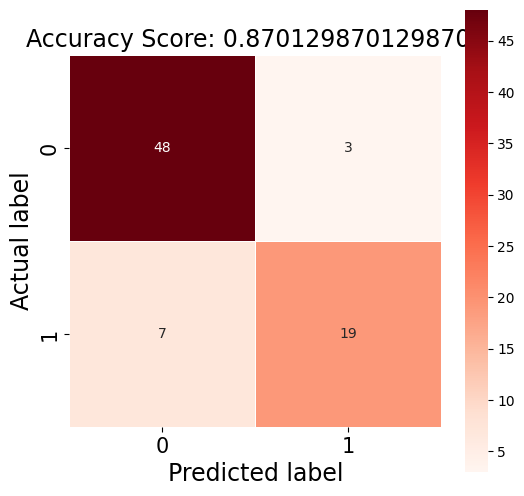

In [ ]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Reds');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

##Sample Test

In [ ]:
import numpy as np

sample_input = np.array([[3, 120, 70, 30, 100, 25, 0.5, 40]])
scaled_sample_input = scaler.transform(sample_input)
prediction = clf.predict(scaled_sample_input)[0]
probability = clf.predict_proba(scaled_sample_input)

print("Sample Input: ", sample_input, "\n")
print("Prediction: ", prediction)
print("Probability: ", probability)

Sample Input:  [[  3.  120.   70.   30.  100.   25.    0.5  40. ]] 

Prediction:  0
Probability:  [[0.81759917 0.18240083]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
